# Code to extract data from Dicom images with radiomics

In [1]:
import pylidc as pl
import numpy as np
import pandas as pd
import SimpleITK as sitk
from radiomics import featureextractor

In [2]:
# formato para o dataframe
df_pyradiomics = pd.DataFrame(columns= [
                            'case_id',
                            'original_shape_Elongation',
                            'original_shape_Flatness',
                            'original_shape_LeastAxisLength',
                            'original_shape_MajorAxisLength',
                            'original_shape_Maximum2DDiameterColumn',
                            'original_shape_Maximum2DDiameterRow',
                            'original_shape_Maximum2DDiameterSlice',
                            'original_shape_Maximum3DDiameter',
                            'original_shape_MeshVolume',
                            'original_shape_MinorAxisLength',
                            'original_shape_Sphericity',
                            'original_shape_SurfaceArea',
                            'original_shape_SurfaceVolumeRatio',
                            'original_shape_VoxelVolume', 
                            'original_firstorder_10Percentile',
                            'original_firstorder_90Percentile',
                            'original_firstorder_Energy',
                            'original_firstorder_Entropy',
                            'original_firstorder_InterquartileRange',
                            'original_firstorder_Kurtosis',
                            'original_firstorder_Maximum',
                            'original_firstorder_MeanAbsoluteDeviation',
                            'original_firstorder_Mean',
                            'original_firstorder_Median',
                            'original_firstorder_Minimum',
                            'original_firstorder_Range',
                            'original_firstorder_RobustMeanAbsoluteDeviation',
                            'original_firstorder_RootMeanSquared',
                            'original_firstorder_Skewness',
                            'original_firstorder_TotalEnergy',
                            'original_firstorder_Uniformity',
                            'original_firstorder_Variance',
                            'original_glcm_Autocorrelation',
                            'original_glcm_ClusterProminence',
                            'original_glcm_ClusterShade',
                            'original_glcm_ClusterTendency',
                            'original_glcm_Contrast',
                            'original_glcm_Correlation',
                            'original_glcm_DifferenceAverage',
                            'original_glcm_DifferenceEntropy',
                            'original_glcm_DifferenceVariance',
                            'original_glcm_Id',
                            'original_glcm_Idm',
                            'original_glcm_Idmn',
                            'original_glcm_Idn',
                            'original_glcm_Imc1',
                            'original_glcm_Imc2',
                            'original_glcm_InverseVariance',
                            'original_glcm_JointAverage',
                            'original_glcm_JointEnergy',
                            'original_glcm_JointEntropy',
                            'original_glcm_MCC',
                            'original_glcm_MaximumProbability',
                            'original_glcm_SumAverage',
                            'original_glcm_SumEntropy',
                            'original_glcm_SumSquares',
                            'original_gldm_DependenceEntropy',
                            'original_gldm_DependenceNonUniformity',
                            'original_gldm_DependenceNonUniformityNormalized',
                            'original_gldm_DependenceVariance',
                            'original_gldm_GrayLevelNonUniformity',
                            'original_gldm_GrayLevelVariance',
                            'original_gldm_HighGrayLevelEmphasis',
                            'original_gldm_LargeDependenceEmphasis',
                            'original_gldm_LargeDependenceHighGrayLevelEmphasis',
                            'original_gldm_LargeDependenceLowGrayLevelEmphasis',
                            'original_gldm_LowGrayLevelEmphasis',
                            'original_gldm_SmallDependenceEmphasis', 
                            'original_gldm_SmallDependenceHighGrayLevelEmphasis',
                            'original_gldm_SmallDependenceLowGrayLevelEmphasis',
                            'original_glrlm_GrayLevelNonUniformity',
                            'original_glrlm_GrayLevelNonUniformityNormalized',
                            'original_glrlm_GrayLevelVariance',
                            'original_glrlm_HighGrayLevelRunEmphasis',
                            'original_glrlm_LongRunEmphasis',
                            'original_glrlm_LongRunHighGrayLevelEmphasis',
                            'original_glrlm_LongRunLowGrayLevelEmphasis',
                            'original_glrlm_LowGrayLevelRunEmphasis',
                            'original_glrlm_RunEntropy',
                            'original_glrlm_RunLengthNonUniformity',
                            'original_glrlm_RunLengthNonUniformityNormalized',
                            'original_glrlm_RunPercentage',
                            'original_glrlm_RunVariance',
                            'original_glrlm_ShortRunEmphasis',
                            'original_glrlm_ShortRunHighGrayLevelEmphasis',
                            'original_glrlm_ShortRunLowGrayLevelEmphasis',
                            'original_glszm_GrayLevelNonUniformity',
                            'original_glszm_GrayLevelNonUniformityNormalized',
                            'original_glszm_GrayLevelVariance',
                            'original_glszm_HighGrayLevelZoneEmphasis',
                            'original_glszm_LargeAreaEmphasis',
                            'original_glszm_LargeAreaHighGrayLevelEmphasis',
                            'original_glszm_LargeAreaLowGrayLevelEmphasis',
                            'original_glszm_LowGrayLevelZoneEmphasis',
                            'original_glszm_SizeZoneNonUniformity',
                            'original_glszm_SizeZoneNonUniformityNormalized',
                            'original_glszm_SmallAreaEmphasis',
                            'original_glszm_SmallAreaHighGrayLevelEmphasis',
                            'original_glszm_SmallAreaLowGrayLevelEmphasis',
                            'original_glszm_ZoneEntropy',
                            'original_glszm_ZonePercentage',
                            'original_glszm_ZoneVariance',
                            'original_ngtdm_Busyness',
                            'original_ngtdm_Coarseness',
                            'original_ngtdm_Complexity',
                            'original_ngtdm_Contrast',
                            'original_ngtdm_Strength',])

In [ ]:
# obter os scans de cada paciente
scans = pl.query(pl.Scan).all()
for scan in scans:

    annotations = scan.annotations
    if len(annotations) == 0: continue  # o dataset downloaded tem as imagens do scan mas o pylidc nao tem anotacoes entao ignoramos esse paciente (no total temos 875 pacientes com anotacoes)
    print(scan.patient_id)
    volume = scan.to_volume() # as imagens dicom do paciente

    for ann in annotations:
        dic_to_df = dict((col, "") for col in df_pyradiomics.columns)

        mask = ann.boolean_mask() # mask das anotacoes ja criadas
        bbox = ann.bbox() # posicao da mask em reacao ha imagem total

        '''
        basicamente as imagens (var: volume) tem 512x512 e as mask sao menores
        entao temos de criar uma mask 512x512 com o mesmo shape das imagens
        começamos por iniciar todos os pontos a '0' e usando bbox com as coordenadas do nodulo, 
        podemos associar qual a posicao correta da mask reduzida para o tamanho total das imagens e ja na altura correta
        depois apenas copiamos os valores da mask para a nova mask
        '''
        full_mask = np.zeros(volume.shape, dtype=np.uint8)
        x_slice, y_slice, z_slice = bbox
        full_mask[x_slice, y_slice, z_slice] = mask


        '''
        pyradiomics usa um tipo de imagens diferente entao temos de converter as nossas imagens|masks que atualmente estao no formato de np.array(512,512,n_imagens)
        '''
        sitk_image = sitk.GetImageFromArray(volume)
        sitk_mask = sitk.GetImageFromArray(full_mask)

        sitk_mask.CopyInformation(sitk_image) # assegurar que a full_mask e a imagem tem o mesmo formato ?

        
        extractor = featureextractor.RadiomicsFeatureExtractor() # extrator para as features do pyradiomics
        features = extractor.execute(sitk_image, sitk_mask)
        
        # mantem apenas as features desejadas
        dic_to_df['case_id'] = f"{ann.scan.patient_id}_{ann.scan.id}_{ann.id}"
        
        for feature,value in features.items():
            if "original" in feature[:8]:
                dic_to_df[feature] = value
                # print(f"{feature}: {value}")

        df_pyradiomics.loc[len(df_pyradiomics)] = dic_to_df
        
#ordenar o dataset pelo patient_id (paciente 0001 no topo)
df_pyradiomics.sort_values(by=["case_id"], inplace=True)
df_pyradiomics.to_csv('pyradiomics_features.csv', sep=',', index=False)

In [6]:
# read csv
df_pyradiomics = pd.read_csv('pyradiomics_features.csv')
print(f'shape: {df_pyradiomics.shape}')

df_pyradiomics.head()

shape: (6859, 108)


,case_id,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,LIDC-IDRI-0001_12_84,0.971629,0.246297,8.235017,33.435268,48.010416,47.010637,38.013156,48.020829,5864.541667,...,483.296288,0.004546,6.732722,0.385436,414.304345,0.424981,0.001246,3530.882483,0.437721,1.462896
1,LIDC-IDRI-0001_12_85,0.933907,0.213370,6.940565,32.528335,39.051248,45.803930,40.000000,46.904158,4556.708333,...,547.237779,0.002514,6.295373,0.310427,661.094152,0.357455,0.001365,2759.327693,0.151270,1.826502
2,LIDC-IDRI-0001_12_86,0.971849,0.237372,7.523759,31.696116,38.013156,44.045431,35.128336,47.675990,4912.708333,...,484.472631,0.002874,6.470309,0.337235,567.412320,0.418091,0.001276,2898.780826,0.262738,1.433190
3,LIDC-IDRI-0001_12_87,0.944220,0.253654,8.264833,32.583138,45.011110,46.065171,35.014283,51.303021,5434.500000,...,411.678076,0.003836,6.535793,0.365951,471.777406,0.501829,0.001217,2966.138806,0.390881,1.158140
4,LIDC-IDRI-0002_13_88,0.751149,0.548785,18.996136,34.614919,34.176015,45.177428,48.093659,51.176166,10245.750000,...,168.874421,0.006796,6.832281,0.161337,1046.374488,1.642044,0.001255,995.208220,0.053432,0.985589


# Example of the segmentation for the nodule in a 3d vision

c:\Users\joaob\virt_env\LabIACD_1.2\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


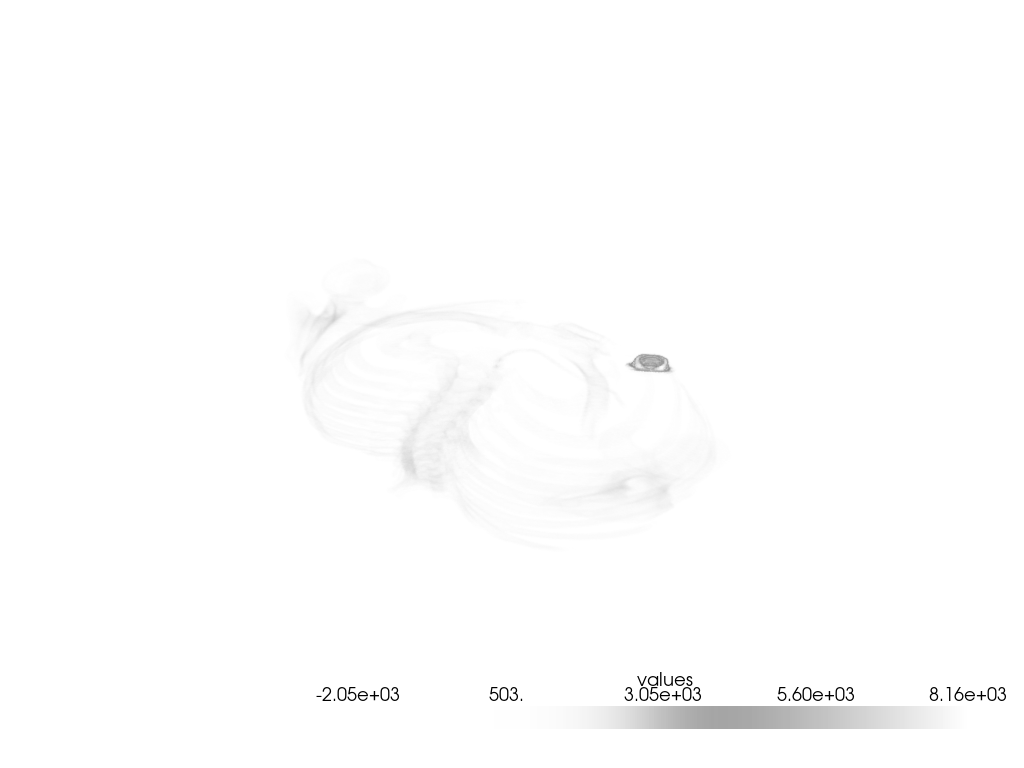

In [6]:
# codigo do chat gtp para visualizar em 3D

import pyvista as pv
# Load the image
image_array = sitk.GetArrayFromImage(sitk_image)  # Get the 3D image as a numpy array

# Convert the NumPy array to a PyVista grid for rendering
volume = pv.wrap(image_array)

# Create a plotter for 3D visualization
plotter = pv.Plotter()
plotter.add_volume(volume, cmap="gray", opacity="sigmoid")  # Adjust opacity and color map
plotter.show()
